In [4]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler.fit(df_market_data)
scaled_df = scaler.transform(df_market_data)
scaled_df

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [11]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original DataFrame

df_market_data_scaled = pd.DataFrame(scaled_df, columns=df_market_data.columns)
#df_scaled


# Set the coin_id column as index
df_market_data_scaled.index = df_market_data.index

# Display the scaled DataFrame
df_market_data_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [14]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

inertia

C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[287.0,
 195.82021818036043,
 123.19048183836958,
 79.02243535120977,
 63.85866780584266,
 53.057788465670605,
 44.40679058461641,
 37.07823336746088,
 32.83218742836354,
 28.165433305979256,
 24.9646378775424]

In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


In [17]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [21]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1, n_init=10)

In [22]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)

C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=1)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k_lower = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_lower

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [24]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_predictions = df_market_data_scaled.copy()

In [25]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_predictions['clusters_lower'] = k_lower

# Display the copy of the scaled DataFrame
df_market_data_scaled_predictions

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [26]:
df_market_data_scaled_predictions

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [88]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_market_data_scaled_predictions['coin_id'] = df_market_data_scaled_predictions.index

df_market_data_scaled_predictions_scatter = df_market_data_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower",
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    xlabel='price_change_percentage_24h',
    ylabel='price_change_percentage_7d'
).opts(yformatter="%.0f")

df_market_data_scaled_predictions_scatter

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [31]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
market_data_scaled_pca = pca.fit_transform(df_market_data_scaled)

# View the scaled PCA data
market_data_scaled_pca

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [32]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.3719856  0.34700813 0.17603793]
0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984

In [34]:
# Create a new DataFrame with the PCA data.
df_market_data_scaled_pca = pd.DataFrame(
    market_data_scaled_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original scaled DataFrame
df_market_data_scaled_pca['coin_id'] = df_market_data_scaled.index

# Set the coin_id column as index
df_market_data_scaled_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_market_data_scaled_pca

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [37]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [38]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=1, n_init=10)
    k_model.fit(df_market_data_scaled_pca)
    inertia.append(k_model.inertia_)

inertia

C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[256.8740855678923,
 165.90199402036,
 93.77462568057297,
 49.66549665179737,
 38.0727921501432,
 27.720626194899804,
 21.14531212162249,
 17.20854579584951,
 13.719376402257227,
 10.559357562793434,
 8.058821888712735]

In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_pca = pd.DataFrame(elbow_data_pca)

df_elbow_data_pca

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.720626
6,7,21.145312
7,8,17.208546
8,9,13.719376
9,10,10.559358


In [40]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_data_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k_values
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [68]:
# Initialize the K-Means model using the best value for k
pca_model = KMeans(n_clusters=4, random_state=0)

In [70]:
# Fit the K-Means model using the PCA data
pca_model.fit(df_market_data_scaled_pca)

C:\Users\hargu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [74]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_k_4 = pca_model.predict(df_market_data_scaled_pca)

# Print the resulting array of cluster values.
pca_k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [76]:
# Create a copy of the scaled PCA DataFrame
df_predictions_market_data_scaled_pca = df_market_data_scaled_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_predictions_market_data_scaled_pca['pca_k_4'] = pca_k_4

# Display the copy of the scaled PCA DataFrame
df_predictions_market_data_scaled_pca

,PCA1,PCA2,PCA3,pca_k_4
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [84]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_predictions_market_data_scaled_pca['coin_id'] = df_predictions_market_data_scaled_pca.index

df_predictions_market_data_scaled_pca_scatter = df_predictions_market_data_scaled_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_k_4",
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters',
    xlabel='PCA1',
    ylabel='PCA2'
).opts(yformatter="%.0f")

df_predictions_market_data_scaled_pca_scatter

:NdOverlay   [pca_k_4]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

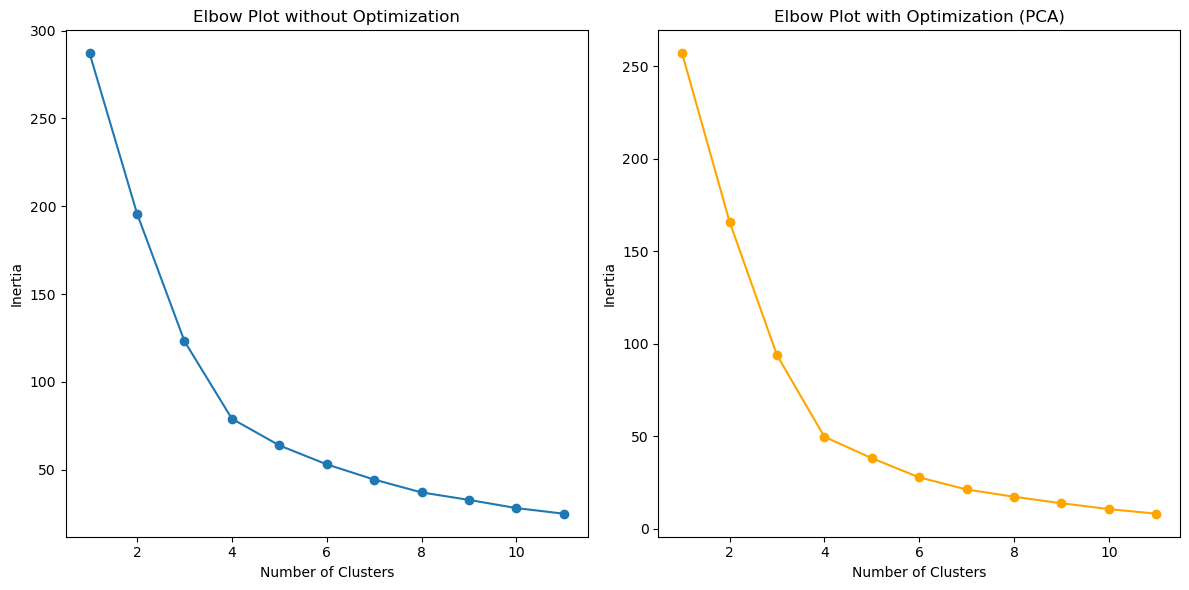

In [82]:
# Composite plot to contrast the Elbow curves
# Create the elbow plot
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Plot without Optimization')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(df_elbow_data_pca['k'], df_elbow_data_pca['inertia'], marker='o', color='orange')
plt.title('Elbow Plot with Optimization (PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

In [98]:
# Composite plot to contrast the clusters
df_market_data_scaled_predictions_scatter + df_predictions_market_data_scaled_pca_scatter

:Layout
   .NdOverlay.I  :NdOverlay   [clusters_lower]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_k_4]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The clusters are well formed and easily identifiable after optimization using PCA i.e. reducing it to fewer features.